 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1379]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [1380]:
# Reading whale returns
whale_returns_df = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1381]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1382]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [1383]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1384]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [1385]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [1386]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv("sp500_history.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [1387]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [1388]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].astype(str)
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "", regex=True)
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [1389]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()

sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [1390]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()

sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [1391]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})

sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1392]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

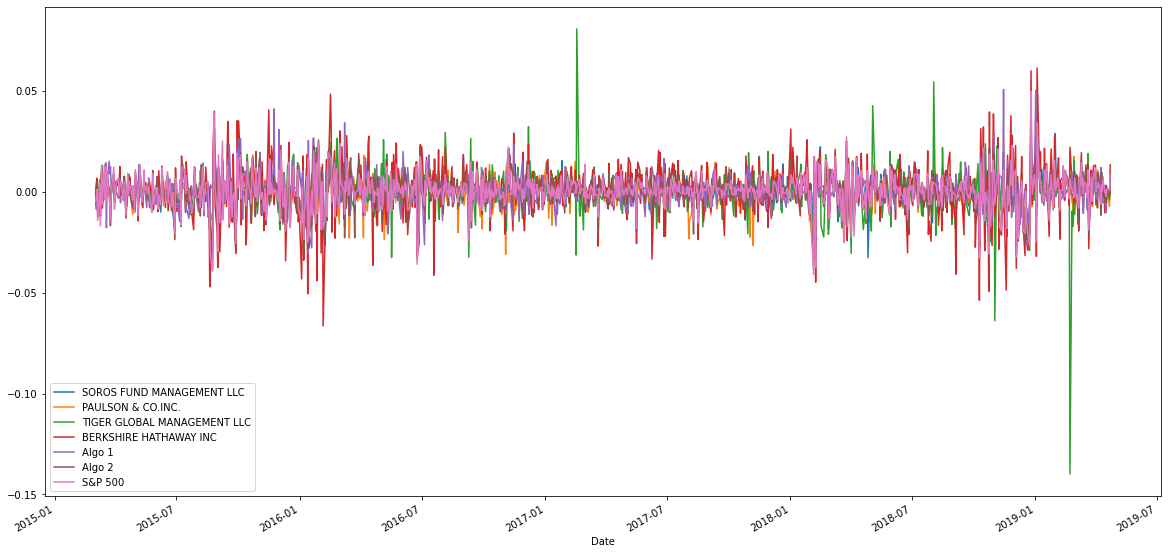

In [1393]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

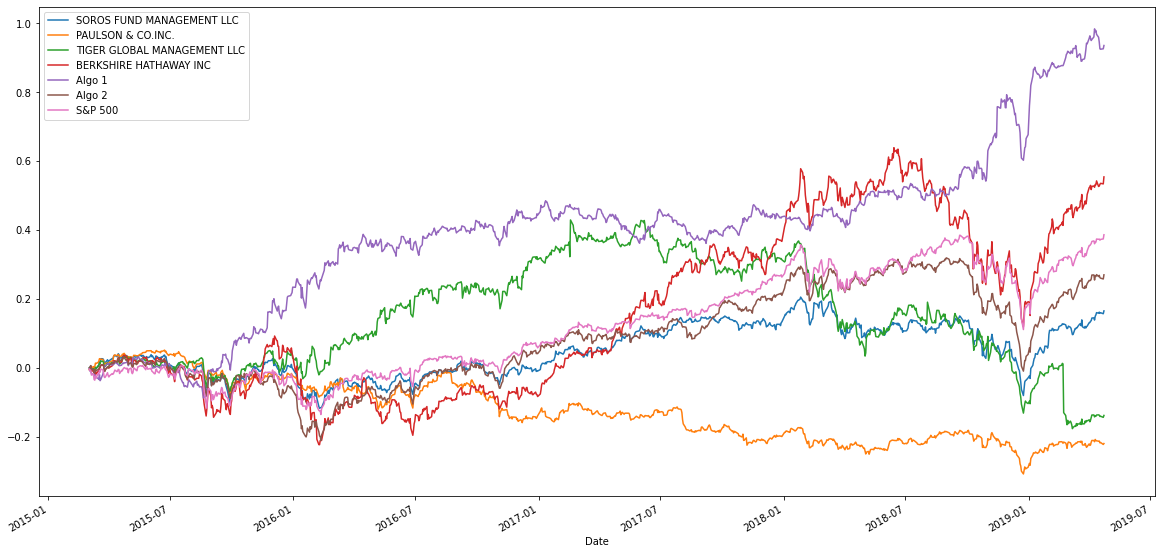

In [1394]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

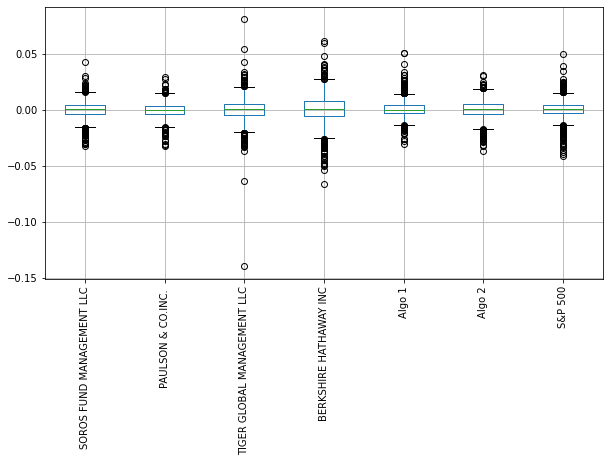

In [1395]:
# Box plot to visually show risk
combined_df.boxplot(rot=90, figsize=(10, 5))

### Calculate Standard Deviations

In [1396]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std(axis=0)
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [1397]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df["S&P 500"].std(axis=0)

sp500_std

0.008553731597758204

In [1398]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = []

for value in combined_std.iteritems():
   if value[1] > sp500_std:
    riskier_than_sp500.append(value)
    
riskier_than_sp500

[('TIGER GLOBAL MANAGEMENT LLC', 0.010893969618743005),
 ('BERKSHIRE HATHAWAY INC', 0.012918618441883491)]

### Calculate the Annualized Standard Deviation

In [1399]:
# Calculate the annualized standard deviation (252 trading days)
annual_combined_std = combined_std * np.sqrt(252)

annual_combined_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [1400]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = combined_df.rolling(window=21).std()

rolling_21_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

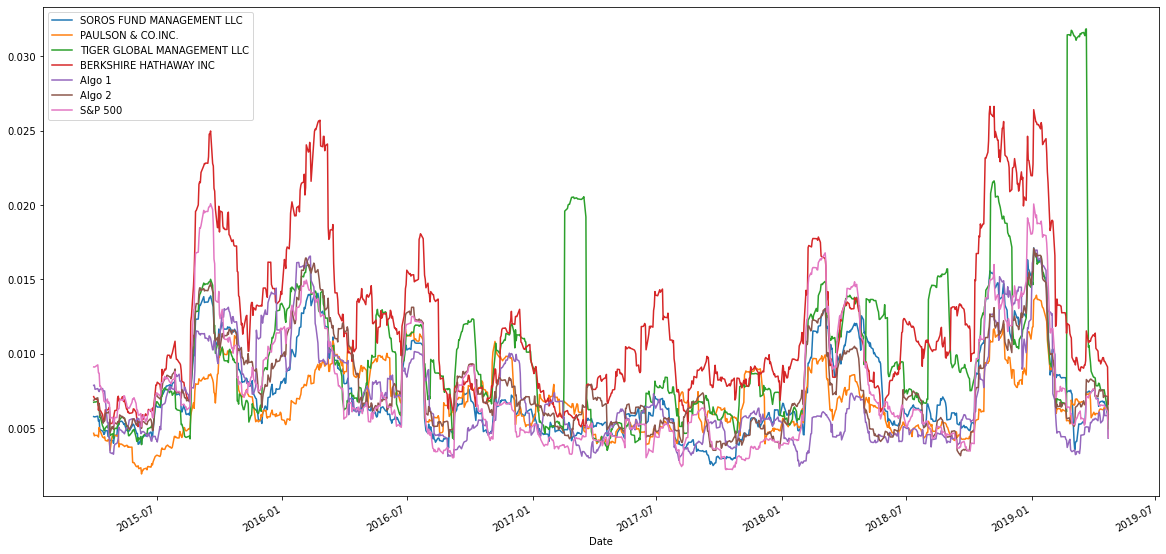

In [1401]:
# Plot the rolling standard deviation
rolling_21_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [1402]:
# Calculate the correlation
df_correlation = combined_df.corr()

df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


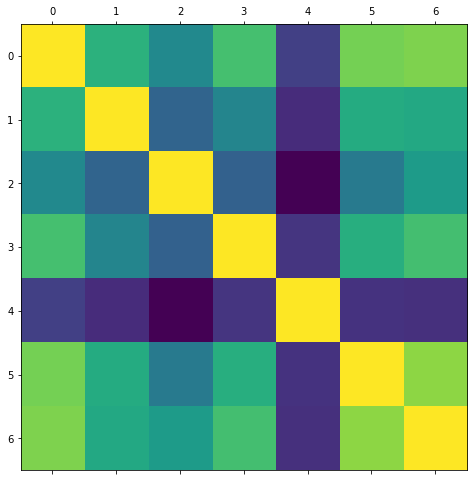

In [1403]:
# Display de correlation matrix
color_plot = plt.figure(figsize=(8, 8))
plt.matshow(df_correlation, fignum=color_plot.number)

plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'45-Day Rolling Beta of Berkshire Hathaway'}, xlabel='Date'>

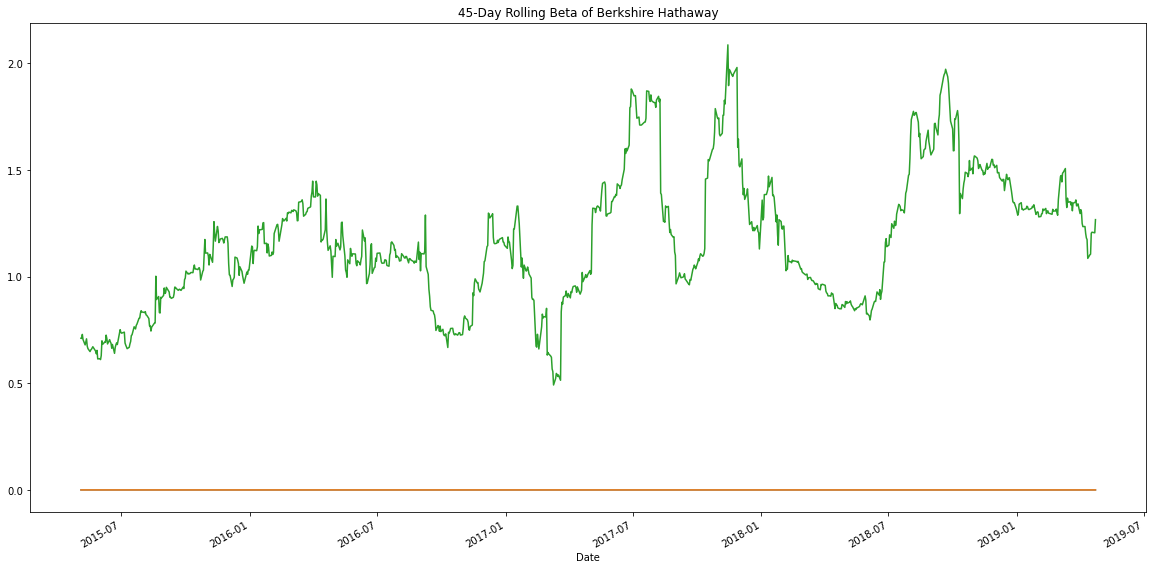

In [1404]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P 500"])
berkshire_covariance

# Calculate variance of S&P 500
sp500_variance = combined_df["S&P 500"].var()
sp500_variance

# Computing beta
berkshire_beta = berkshire_covariance / sp500_variance
berkshire_beta

# Plot beta trend
rolling_covar = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=45).cov(combined_df["S&P 500"])
rolling_covar.plot(figsize=(20, 10), title='45-Day Rolling Covariance of Berkshire Hathaway Returns vs. S&P 500 Returns')

rolling_var = combined_df["S&P 500"].rolling(window=45).var()
rolling_var.plot(figsize=(20, 10), title='45-Day Rolling Variance of S&P 500 Returns')

rolling_beta = rolling_covar / rolling_var
rolling_beta.plot(figsize=(20, 10), title='45-Day Rolling Beta of Berkshire Hathaway')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [1405]:
# Use `ewm` to calculate the rolling window

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1406]:
# Annualized Sharpe Ratios
combined_sharpe_ratios = (combined_df.mean() * 252) / (combined_std * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

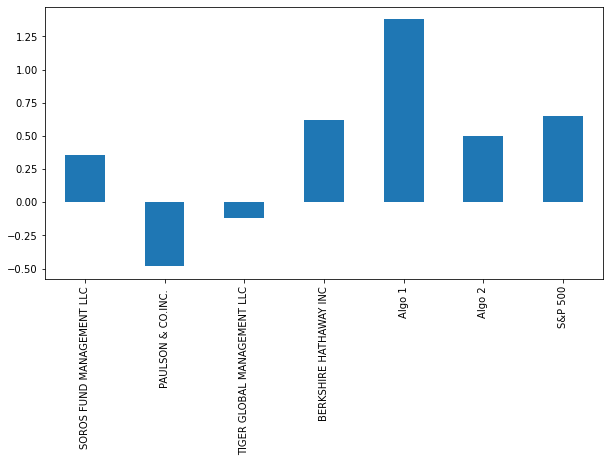

In [1407]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot.bar(figsize=(10, 5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms all other portfolios!  Both in terms of total returns, but more importantly, Algo 1 has the highest Sharpe Ratio.  Algo 2 still performed decently well as compared to 3 of the 4 whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1408]:
# Reading data from 1st stock
disney_closing_prices = pd.read_csv("Stock Data - DIS.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
disney_closing_prices.sort_index()
disney_closing_prices.head()

,Close
Date,
2015-03-02,105.89
2015-03-03,106.35
2015-03-04,105.57
2015-03-05,105.03
2015-03-06,103.82


In [1409]:
# Reading data from 2nd stock
tesla_closing_prices = pd.read_csv("Stock Data - TSLA.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
tesla_closing_prices.sort_index()
tesla_closing_prices.head()

,Close
Date,
2015-03-02,13.16
2015-03-03,13.30
2015-03-04,13.50
2015-03-05,13.38
2015-03-06,12.93


In [1410]:
# Reading data from 3rd stock
starbucks_closing_prices = pd.read_csv("Stock Data - SBUX.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
starbucks_closing_prices.sort_index()
starbucks_closing_prices.head()

,Close
Date,
2015-03-02,47.11
2015-03-03,47.00
2015-03-04,46.53
2015-03-05,46.82
2015-03-06,46.11


In [1411]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([disney_closing_prices, tesla_closing_prices, starbucks_closing_prices], axis='columns', join='inner')
my_portfolio_df

,Close,Close,Close
Date,,,
2015-03-02,105.89,13.16,47.11
2015-03-03,106.35,13.30,47.00
2015-03-04,105.57,13.50,46.53
2015-03-05,105.03,13.38,46.82
2015-03-06,103.82,12.93,46.11
...,...,...,...
2022-08-25,117.46,296.07,87.39
2022-08-26,114.07,288.09,84.06
2022-08-29,113.53,284.82,84.12


In [1412]:
# Reset Date index
""" Date is already the index """

my_portfolio_df

,Close,Close,Close
Date,,,
2015-03-02,105.89,13.16,47.11
2015-03-03,106.35,13.30,47.00
2015-03-04,105.57,13.50,46.53
2015-03-05,105.03,13.38,46.82
2015-03-06,103.82,12.93,46.11
...,...,...,...
2022-08-25,117.46,296.07,87.39
2022-08-26,114.07,288.09,84.06
2022-08-29,113.53,284.82,84.12


In [1413]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_df.set_axis(["DIS", "TSLA", "SBUX"], axis=1, inplace=True)
my_portfolio_df

,DIS,TSLA,SBUX
Date,,,
2015-03-02,105.89,13.16,47.11
2015-03-03,106.35,13.30,47.00
2015-03-04,105.57,13.50,46.53
2015-03-05,105.03,13.38,46.82
2015-03-06,103.82,12.93,46.11
...,...,...,...
2022-08-25,117.46,296.07,87.39
2022-08-26,114.07,288.09,84.06
2022-08-29,113.53,284.82,84.12


In [1414]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio_df.pct_change()
my_portfolio_daily_returns

# Drop NAs
my_portfolio_daily_returns = my_portfolio_daily_returns.dropna()
my_portfolio_daily_returns

# Display sample data
my_portfolio_daily_returns.head()

,DIS,TSLA,SBUX
Date,,,
2015-03-03,0.004344,0.010638,-0.002335
2015-03-04,-0.007334,0.015038,-0.010000
2015-03-05,-0.005115,-0.008889,0.006233
2015-03-06,-0.011521,-0.033632,-0.015164
2015-03-09,0.013870,-0.015468,0.008892


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1415]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_daily_returns = my_portfolio_daily_returns * weights

my_portfolio_total_returns_per_company = weighted_daily_returns.sum(axis=0)

my_portfolio_total_daily_returns = weighted_daily_returns.sum(axis=1)

my_portfolio_total_alltime_return = my_portfolio_total_daily_returns.sum()

In [1416]:
# Display sample data
weighted_daily_returns

,DIS,TSLA,SBUX
Date,,,
2015-03-03,0.001448,0.003546,-0.000778
2015-03-04,-0.002445,0.005013,-0.003333
2015-03-05,-0.001705,-0.002963,0.002078
2015-03-06,-0.003840,-0.011211,-0.005055
2015-03-09,0.004623,-0.005156,0.002964
...,...,...,...
2022-08-25,0.003007,-0.001156,0.005191
2022-08-26,-0.009620,-0.008984,-0.012702
2022-08-29,-0.001578,-0.003784,0.000238


<AxesSubplot:>

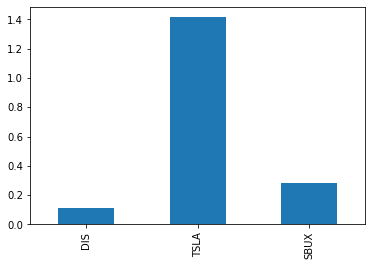

In [1417]:
# Display sample data
my_portfolio_total_returns_per_company

# Plotted
my_portfolio_total_returns_per_company.plot.bar()

In [1418]:
# Display sample data
my_portfolio_total_daily_returns = pd.Series(my_portfolio_total_daily_returns, name="My Portfolio")
my_portfolio_total_daily_returns

Date
2015-03-03    0.004216
2015-03-04   -0.000766
2015-03-05   -0.002590
2015-03-06   -0.020106
2015-03-09    0.002431
                ...   
2022-08-25    0.007042
2022-08-26   -0.031306
2022-08-29   -0.005124
2022-08-30   -0.014376
2022-08-31   -0.000909
Name: My Portfolio, Length: 1890, dtype: float64

In [1419]:
# Display sample data
my_portfolio_total_alltime_return

1.8117297268370953

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1420]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_comparison_daily_returns_df = pd.concat([combined_df, my_portfolio_total_daily_returns], axis=1)
portfolio_comparison_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.004216
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.000766
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.002590
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020106
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.002431
...,...,...,...,...,...,...,...,...
2022-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007042
2022-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031306
2022-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005124


In [1421]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_comparison_daily_returns_df = portfolio_comparison_daily_returns_df.dropna()
portfolio_comparison_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.004216
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.000766
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.002590
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020106
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.002431
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.001218
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.000368
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.008523


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [1422]:
# Calculate the annualized `std`
portfolio_comparison_std = portfolio_comparison_daily_returns_df.std()
portfolio_comparison_std

portfolio_comparison_annualized_std = portfolio_comparison_std * np.sqrt(252)
portfolio_comparison_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
My Portfolio                   0.208157
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

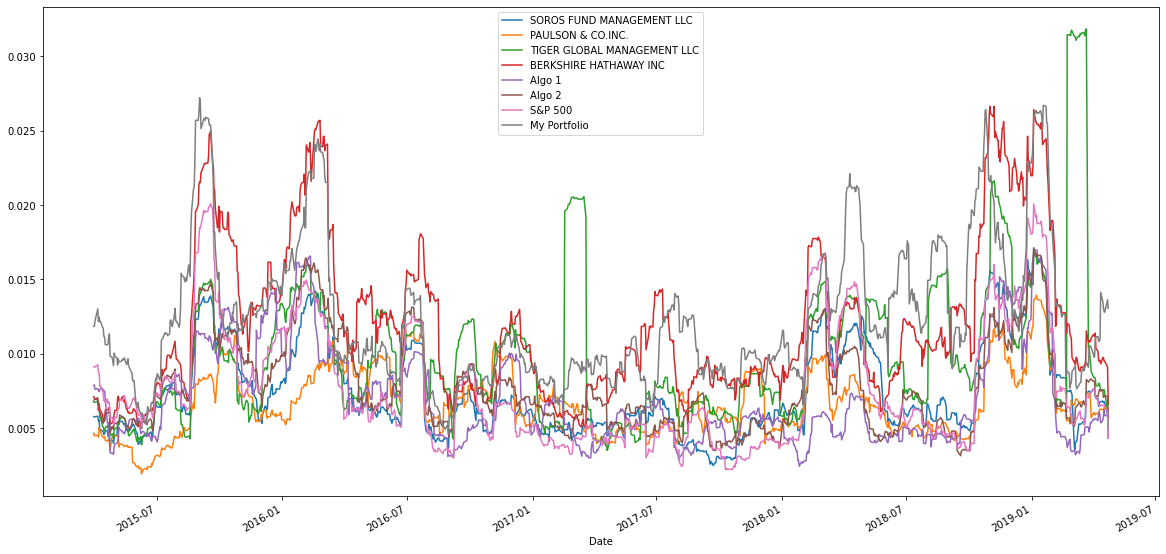

In [1423]:
# Calculate rolling standard deviation
portfolio_comp_rolling_std = portfolio_comparison_daily_returns_df.rolling(window=21).std()
portfolio_comp_rolling_std

# Plot rolling standard deviation
portfolio_comp_rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

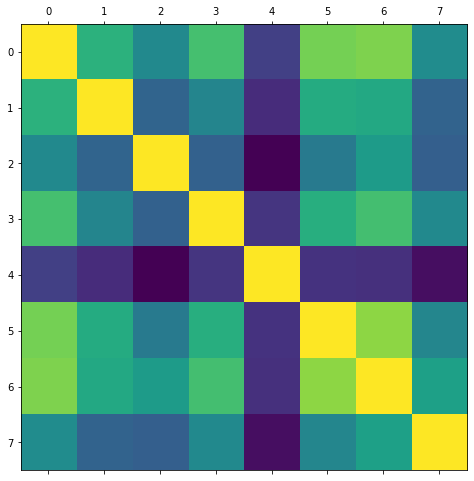

In [1424]:
# Calculate and plot the correlation
correlation_analysis = portfolio_comparison_daily_returns_df.corr()
correlation_analysis

correlation_analysis_plot = plt.figure(figsize=(8, 8))
plt.matshow(correlation_analysis, fignum=correlation_analysis_plot.number)

plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [1425]:
# Calculate and plot Beta
myportfolio_covar = portfolio_comparison_daily_returns_df["My Portfolio"].cov(portfolio_comparison_daily_returns_df["S&P 500"])
myportfolio_covar

sp500_var = portfolio_comparison_daily_returns_df["S&P 500"].var()
sp500_var

myportfolio_beta = myportfolio_covar / sp500_var
myportfolio_beta

0.9805912544582636

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1426]:
# Calculate Annualized Sharpe Ratios
portfolio_comp_sharpe_ratios = (portfolio_comparison_daily_returns_df.mean() * 252) / (portfolio_comparison_std * np.sqrt(252))
portfolio_comp_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
My Portfolio                   0.608535
dtype: float64

<AxesSubplot:title={'center':'Portfolio Analysis - Sharpe Ratios'}>

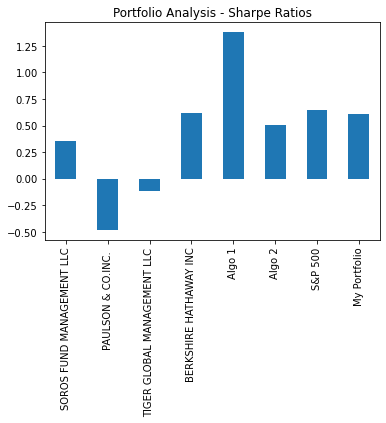

In [1427]:
# Visualize the sharpe ratios as a bar plot
portfolio_comp_sharpe_ratios.plot.bar(title='Portfolio Analysis - Sharpe Ratios')

### How does your portfolio do?

My Portfolio performed well, but still not as well as Algo 1, Berkshire Hathaway, or the S&P 500.  With the beta for My Portfolio being less than 1.0, with another attempt, I would add 1-2 riskier investments to increase the possible upside.